In [1]:
import os
import pandas as pd
import numpy as np
import yfinance as yf
import yahoo_fin.stock_info as sf
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr
from functools import reduce

# Setting options in pandas 

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
pd.set_option=('display.max_columns',None)
pd.set_option=('display.rows',None)

In [4]:
start = dt.datetime(2000,1,1)
end = dt.datetime.now()

Everytime give it a ticker name gives it what we want

In [5]:
def get_stock(ticker):
    #give it ticker
    data = pdr.DataReader(f"{ticker}", "yahoo",start,end)
    # want only adjusted close
    data[f"{ticker}"] = data["Adj Close"]
    data = data[[f'{ticker}']]
    print(data.head())
    return data

In [6]:
cvs = get_stock("CVS")
humana = get_stock("HUM")
labcorp = get_stock("LH")

             CVS
Date            
2000-01-03 13.75
2000-01-04 13.64
2000-01-05 14.39
2000-01-06 13.36
2000-01-07 13.68
            HUM
Date           
2000-01-03 6.90
2000-01-04 6.96
2000-01-05 7.13
2000-01-06 7.42
2000-01-07 7.99
             LH
Date           
2000-01-03 9.06
2000-01-04 8.75
2000-01-05 8.75
2000-01-06 8.59
2000-01-07 8.91


# Merges observations next to each other
Based on date
function

In [7]:
def merge_stocks(tickers):
    #make empty df to put in
    data_frame = []
    for i in tickers:
        #Using function just defined
        data_frame.append(get_stock(i))
    df_merged = reduce(lambda left,right:pd.merge(left,right,on =["Date"], how="outer"),data_frame)
    print(df_merged.head())
    return df_merged

In [8]:
stocks = ["CVS","HUM","LH"]

In [9]:
merge_stocks(stocks)

             CVS
Date            
2000-01-03 13.75
2000-01-04 13.64
2000-01-05 14.39
2000-01-06 13.36
2000-01-07 13.68
            HUM
Date           
2000-01-03 6.90
2000-01-04 6.96
2000-01-05 7.13
2000-01-06 7.42
2000-01-07 7.99
             LH
Date           
2000-01-03 9.06
2000-01-04 8.75
2000-01-05 8.75
2000-01-06 8.59
2000-01-07 8.91
             CVS  HUM   LH
Date                      
2000-01-03 13.75 6.90 9.06
2000-01-04 13.64 6.96 8.75
2000-01-05 14.39 7.13 8.75
2000-01-06 13.36 7.42 8.59
2000-01-07 13.68 7.99 8.91


,CVS,HUM,LH
Date,,,
2000-01-03,13.75,6.90,9.06
2000-01-04,13.64,6.96,8.75
2000-01-05,14.39,7.13,8.75
2000-01-06,13.36,7.42,8.59
2000-01-07,13.68,7.99,8.91
...,...,...,...
2022-02-25,104.30,432.66,276.63
2022-02-28,103.65,434.32,271.26
2022-03-01,102.05,431.00,269.05


In [10]:
stocks = ["CVS","HUM","LH","CSCO","ORCL","CRM","MCD","TGT","DG","BAC","V","ACN"]

# new data frame which is our portfolio

In [11]:
portfolio = merge_stocks(stocks)

             CVS
Date            
2000-01-03 13.75
2000-01-04 13.64
2000-01-05 14.39
2000-01-06 13.36
2000-01-07 13.68
            HUM
Date           
2000-01-03 6.90
2000-01-04 6.96
2000-01-05 7.13
2000-01-06 7.42
2000-01-07 7.99
             LH
Date           
2000-01-03 9.06
2000-01-04 8.75
2000-01-05 8.75
2000-01-06 8.59
2000-01-07 8.91
            CSCO
Date            
2000-01-03 39.34
2000-01-04 37.13
2000-01-05 37.02
2000-01-06 36.41
2000-01-07 38.55
            ORCL
Date            
2000-01-03 24.90
2000-01-04 22.70
2000-01-05 21.50
2000-01-06 20.24
2000-01-07 21.79
            CRM
Date           
2004-06-23 4.30
2004-06-24 4.19
2004-06-25 3.95
2004-06-28 4.00
2004-06-29 4.10
             MCD
Date            
2000-01-03 22.93
2000-01-04 22.46
2000-01-05 22.82
2000-01-06 22.50
2000-01-07 23.08
             TGT
Date            
2000-01-03 23.97
2000-01-04 22.93
2000-01-05 22.41
2000-01-06 21.35
2000-01-07 22.45
              DG
Date            
2009-11-13 21.12
2009-11-16 21.46
2

# Writing out data

In [12]:
portfolio.to_csv("portfolioclass.csv", index=False)

In [13]:
portfoliodata= pd.read_csv("portfolioclass.csv")

In [14]:
portfoliodata.head()

,CVS,HUM,LH,CSCO,ORCL,CRM,MCD,TGT,DG,BAC,V,ACN
0,13.75,6.90,9.06,39.34,24.90,NaN,22.93,23.97,NaN,13.76,NaN,NaN
1,13.64,6.96,8.75,37.13,22.70,NaN,22.46,22.93,NaN,12.94,NaN,NaN
2,14.39,7.13,8.75,37.02,21.50,NaN,22.82,22.41,NaN,13.08,NaN,NaN
3,13.36,7.42,8.59,36.41,20.24,NaN,22.50,21.35,NaN,14.20,NaN,NaN
4,13.68,7.99,8.91,38.55,21.79,NaN,23.08,22.45,NaN,13.83,NaN,NaN


# Code 3/3
1. Read in portfolio we saved from class
2. 

In [19]:
portfolio= pd.read_csv("portfolioclass.csv")

In [20]:
portfolio.shape

(5578, 12)

# New Package 
for efficient frontier model we talked about in notes

In [18]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


# Import packages

In [22]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

Getting the mean and avariance try to maximizes mean and minimize variance

*Efficient Frontier


**Weights**

Have 3 stocks want in portfolio
APPL, TSLA, MSFT

In the mean variance model we need to find the weights (How much apple we want in portfolio..etc)

25% Apple, 35% TSLA, 45% MSFT

Need weights to calculate expected return

*This model finds optimal weights based on Sharp Ratio*
**(Return on portfolio - Risk free Rate) / Standard deviation in portfolio**
Want sharp ratio to be higher than 1, ideally 2, exceptionally well higher than 3 

Tells most efficient weight, We can't have any input

In [23]:
mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

# import EfficientFrontier

In [27]:
from pypfopt.efficient_frontier import EfficientFrontier

Mean Exepcted Return
And variance

**Ask package to use weights based on max sharp ratio based on each of these assets**


In [28]:
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()

The package gives us the optimal weights in stock that we need to apply

In [33]:
cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'CVS': 0.0, 'HUM': 0.05548, 'LH': 0.0462, 'CSCO': 0.0, 'ORCL': 0.0, 'CRM': 0.05793, 'MCD': 0.0, 'TGT': 0.0, 'DG': 0.52323, 'BAC': 0.0, 'V': 0.27571, 'ACN': 0.04145}


**22 years of return we already have**
Now that we have the weights
We can now find actual return on the entire portfolio if we were to invest X amount of money using those weights

*Ask efficient portfolio to give portfolio performance 

# Return on portfolio
**Sharp ratio gives us a good measure because it creates excess return**
The return of portfolio higher than risk free rate than divided by standard deviation


In [34]:
ef.portfolio_performance(verbose=True)

Expected annual return: 20.9%
Annual volatility: 15.6%
Sharpe Ratio: 1.21


(0.20878169825769755, 0.15572920601487703, 1.2122433748211814)

# Sharp Ratio Formula 

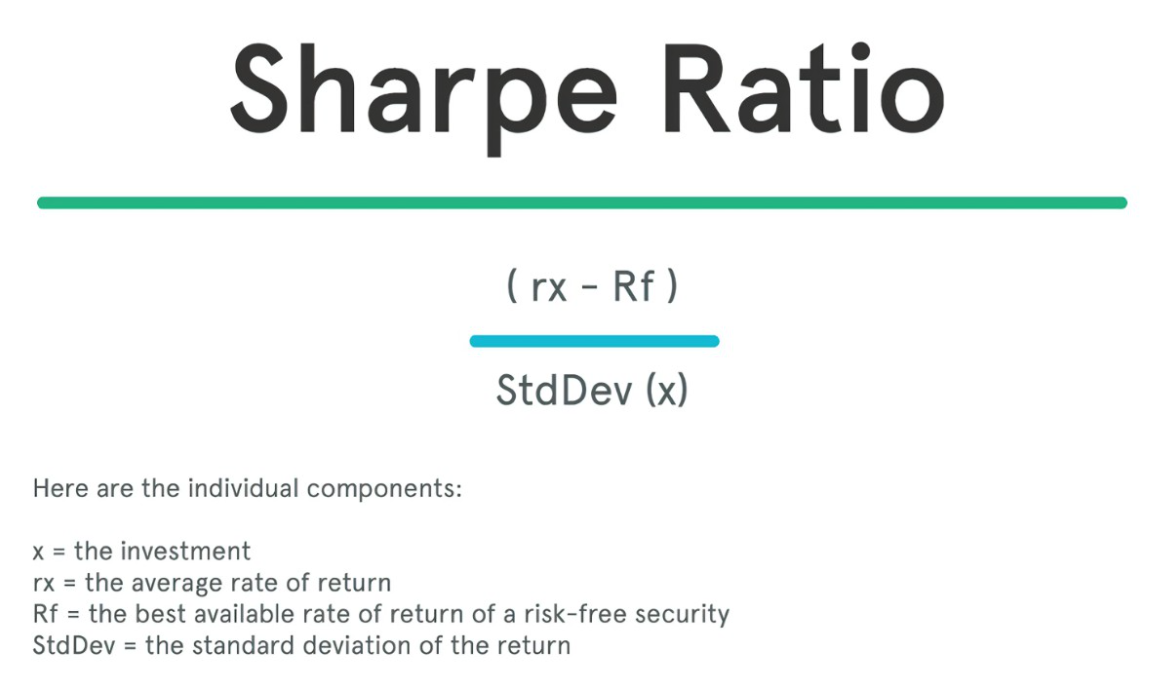

In [46]:
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

Have 10,000 how much are we investing

In [47]:
latest_prices = get_latest_prices(portfolio)
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value=10000)

# How much we have left
allocation,leftover= da.greedy_portfolio()

print("Discrete Allocation:",allocation)
print("Funds Remaining: ${:.2f}".format(leftover))

Discrete Allocation: {'DG': 25, 'V': 13, 'CRM': 3, 'HUM': 1, 'LH': 2, 'ACN': 1}
Funds Remaining: $167.50


1. Using the sharp model, all price value 

We don't wanna predict,

We gave the model the Stocks



# Homework Assingment 

**Homework:**
    Try doing this 
    1. Come up with most diverisifed portfolio try 10 stocks get the most diversifed from 5-10 different industries 
    2. Then try again with 10 stocks in the same industry 
    
Our diverisified portfolio should beat the in same industry porfolio 
    
  Look at our work and see if annualizred return for diversified not higher than the other one thatn markovitz bs.
  
  Whatever time period we prefer but 10 year period. 
  

# HRP method
Different method of Optimization 
(not in homework)

Hierachical Risk:
1. Don't rely a lot on covariance matrix

Covariance matrix: Use variance, any single variance makes it change

HRP clusters all the firms to similar firms with similar return and creates a tree
General idea:
1. Not relying on previous data, not soley on historical return
2. Weights based on similar return of industry

In [51]:
from pypfopt import HRPOpt

In [ ]:
# drop NA if not have price

In [52]:
returns = portfolio.pct_change().dropna()

In [53]:
hrp = HRPOpt(returns)
hrp_weights =hrp.optimize()

In [54]:
hrp_weights

OrderedDict([('ACN', 0.0673532553716464),
             ('BAC', 0.03664012100876457),
             ('CRM', 0.05076694136079195),
             ('CSCO', 0.06369922986925956),
             ('CVS', 0.09931057310302381),
             ('DG', 0.08656563134901339),
             ('HUM', 0.08769394028868605),
             ('LH', 0.09305237561718406),
             ('MCD', 0.15644215369005285),
             ('ORCL', 0.0890794952810463),
             ('TGT', 0.1127549731384169),
             ('V', 0.05664130992211415)])

Expected Annual Return 18.1%
Lower Volatility
Sharp ratio less than 1 

In [55]:
hrp.portfolio_performance(verbose = True)
print(dict(hrp_weights))

Expected annual return: 18.1%
Annual volatility: 16.5%
Sharpe Ratio: 0.98
{'ACN': 0.0673532553716464, 'BAC': 0.03664012100876457, 'CRM': 0.05076694136079195, 'CSCO': 0.06369922986925956, 'CVS': 0.09931057310302381, 'DG': 0.08656563134901339, 'HUM': 0.08769394028868605, 'LH': 0.09305237561718406, 'MCD': 0.15644215369005285, 'ORCL': 0.0890794952810463, 'TGT': 0.1127549731384169, 'V': 0.05664130992211415}


In [58]:
hrp = DiscreteAllocation(hrp_weights,latest_prices,total_portfolio_value=10000)

# How much we have left
allocation,leftover= hrp.greedy_portfolio()

print("Discrete Allocation HRP:",allocation)
print("Funds Remaining HRP : ${:.2f}".format(leftover))

Discrete Allocation HRP: {'MCD': 6, 'TGT': 5, 'CVS': 10, 'LH': 4, 'ORCL': 11, 'HUM': 2, 'DG': 4, 'ACN': 2, 'CSCO': 11, 'V': 3, 'CRM': 2, 'BAC': 9}
Funds Remaining HRP : $49.73


Based on latest price
How many shares to buy from each company 